# Notebook 2

### Gather  Tweets and Plot Locations on a certain Topic  (Superbowl)

##### References:
##### 1. ''R on Jupyter'' - classnotes
##### 2."twitteR.pdf" - http://geoffjentry.hexdump.org/twitteR.pdf
##### 3. https://www.rstudio.com/online-learning/#R
##### 4. SQLite  - https://cran.r-project.org/web/packages/RSQLite/RSQLite.pdf
##### 5. .CSV files - https://cran.r-project.org/doc/manuals/R-data.pdf or http://rprogramming.net/read-csv-in-r/
##### 6. geocode/ get_map - https://cran.r-project.org/web/packages/ggmap/ggmap.pdf
##### 7. summarise/ group_by - https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html
##### 8. geom_point - http://docs.ggplot2.org/current/geom_point.html

In [1]:
#Import all the required Libraries
library("ggmap")
library(maptools)
library(maps)
library(twitteR)
library(RSQLite)
library(plyr)
library(dplyr)

Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: TRUE


In [3]:
#Setup Oauth - using Twitter App Credentials
setup_twitter_oauth('', '', '', '')

[1] "Using direct authentication"


In [2]:
#Connect to the SQLite database
db <- dbConnect(SQLite(), dbname='Superbowl3.sqlite') #There is another Database Superbowl2.sqlite 
sql_lite_file = tempfile()
register_sqlite_backend('Superbowl3.sqlite')

In [299]:
#Search Tweets using some query and functionalities like time frame (since,until), location (geocode),n (number of tweets)
searchQuery <- "#superbowlli"
searchTweets <- searchTwitter(searchQuery,n=1000,since='2017-02-02',geocode='39.5,-98.35,1300mi')

In [300]:
#Store Tweets to the Database
store_tweets_db(searchTweets)

[1] TRUE

In [3]:
#Retrieve Tweets from the Database
from_db = load_tweets_db()
length(from_db)

[1] 15500

In [4]:
#Convert Tweets to a Data Frame
tweetdF <- twListToDF(from_db)  # Convert to a nice dF

In [7]:
userScreenName <- lookupUsers(tweetdF$screenName)  # Lookup Users for Screen Name
userSNdF <- twListToDF(userScreenName)  # Convert it into a Data Frame
userSNdF <- userFrame[-which(userSNdF$location == ""), ] #Remove Users with Blank Location info
Users <- !is.na(userSNdF$location) # Remove Users with NA as location info

In [8]:
length(Users)  #Check the length of Users remaining

[1] 4471

In [9]:
#Split the Data Frame into parts
userloc <- userSNdF$location[1:2500]
#userloc2 <- userSNdF$location[2501:4471]

In [12]:
head(userloc)
#head(userloc2)

[1] "NYC"                 "Chico, CA"           "Duluth MN"          
[4] "Tuscaloosa, AL"      "Desembarco del Rey " "Georgia, USA"

In [14]:
write.csv(userloc,file="userloc.csv",row.names=FALSE)
#write.csv(userloc2,file="userloc2.csv",row.names=FALSE)
#write.csv(userloc3,file="userloc3.csv",row.names=FALSE)
#write.csv(userloc4,file="userloc4.csv",row.names=FALSE)

In [6]:
loc <- readLines("userloc.csv")
#loc <- readLines("userloc2.csv")
#loc <- readLines("userloc3.csv")
#loc <- readLines("userloc4.csv")
#length(userloc2)

In [7]:
#Perform geocode operations on the Locations
locations <- geocode(loc)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22x%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22God%20Bless%20America%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22Worldwide%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22Los%20Angeles,%20CA%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22New%20Port%20Richey,%20Fl%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22from%20Chicago%20%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22New%20York,%20NY%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%22New%20York,%20USA%22&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?add

In [12]:
#Function to check number of geocoding queries remaining
geocodeQueryCheck()

525 geocoding queries remaining.


In [10]:
#Store the data into a CSV file to be able to reuse it afterwards
write.csv(locations,file="geocode_locations1.csv")
#write.csv(locations2,file="geocode_locations2.csv")
#write.csv(locations3,file="geocode_locations3.csv")
#write.csv(locations4,file="geocode_locations4.csv")

In [14]:
#Read the csv data stored earlier - avoids the need of processing it again - saves time
read1 <- read.csv("geocode_locations1.csv")
read2 <- read.csv("geocode_locations2.csv")
read3 <- read.csv("geocode_locations3.csv")
read4 <- read.csv("geocode_locations4.csv")
read <- rbind(read1,read2,read3,read4)

In [15]:
#Grouping function to group nearby tweets based on location and generate a column known as total containing the count
points=summarise(group_by(read,lat,lon),total =n())
#list(points)

In [16]:
#Store the end points into a CSV file and retrieve it later so no need to reprocess it
write.csv(points,file="points.csv")
points <- read.csv("points.csv")

In [17]:
#Get the high-quality roadmap of the united states from Google
map <- get_map(location='united states',color='color',zoom=4,maptype="roadmap",source='google')

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=united+states&zoom=4&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=united%20states&sensor=false


In [18]:
#Assign the map to a variable to be able to use it for plotting later
Map <- ggmap(map)

[1] "Map1"
Map1

Warning message:
"Removed 373 rows containing missing values (geom_point)."

[1] "Map2"
Map2

Warning message:
"Removed 373 rows containing missing values (geom_point)."

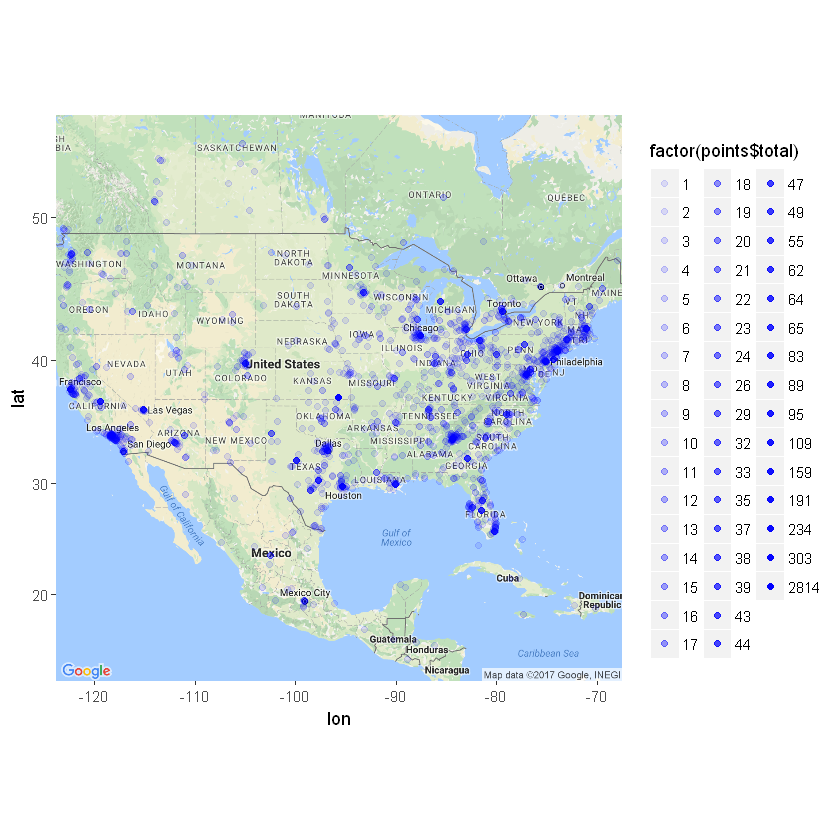

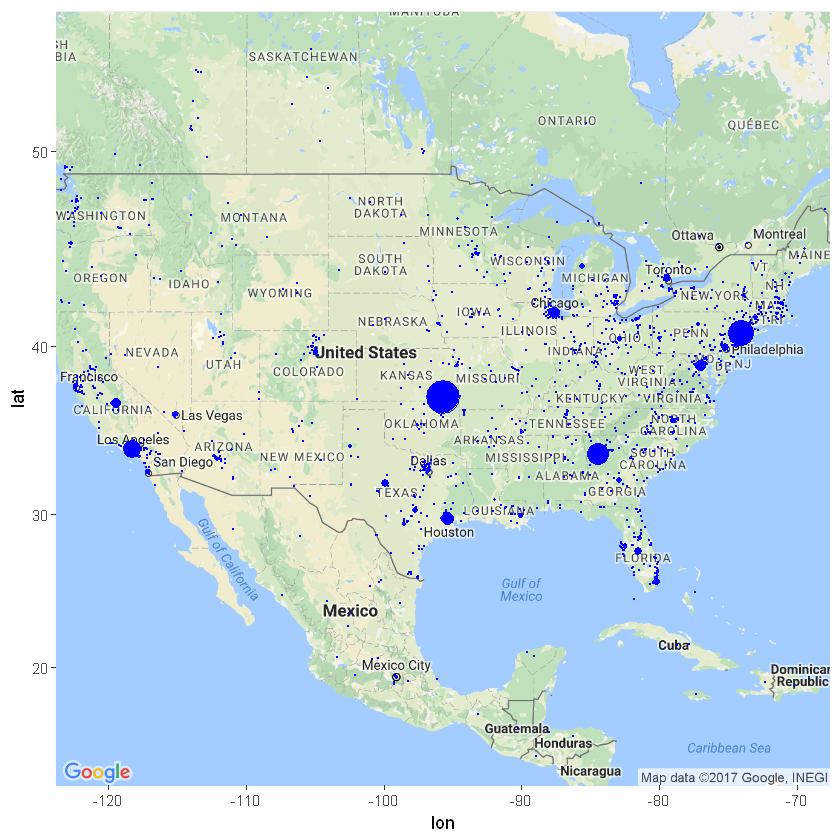

In [52]:
#Add points from the table earlier to the map and print the map
points2plot <- Map + geom_point(data = points, aes(x = points$lon, y=points$lat, alpha = factor(points$total)), color="blue"  )
#The below line provides size wise plotting
points2plot1 <- Map + geom_point(data = points, aes(x = points$lon, y=points$lat),cex = .03*points$total, color="blue"  )
points2plot
points2plot1